In [157]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [53]:
# Import data, add column 'BeachName'; 
# Add column 'BeachType': 0 - open coast beach (Milford, Narrow Neck), 1 - sheltered bay and harbour (Clarks, Judges Bay, Weymouth); 
# Add column 'BeachDirection'(cardinal direction): Clarks-NNW-15, Narrow Neck-NNE-1, Judges Bay-NNE-1, Weymouth-SW-10, Milford-NE-2  
clarks = pd.read_excel('full.xlsx', sheet_name='Clarks')
clarks[['BeachName','BeachType','BeachDirection']]=["Clarks",1,15]
narrow_neck = pd.read_excel('full.xlsx', sheet_name='Narrow Neck')
narrow_neck[['BeachName','BeachType','BeachDirection']]=["Narrow_Neck",0,1]
judges_bay = pd.read_excel('full.xlsx', sheet_name='Judges Bay')
judges_bay[['BeachName','BeachType','BeachDirection']]=["Judges_Bay",1,1]
weymouth = pd.read_excel('full.xlsx', sheet_name='Weymouth')
weymouth[['BeachName','BeachType','BeachDirection']]=["Weymouth",1,10]
milford = pd.read_excel('full.xlsx', sheet_name='Milford')
milford[['BeachName','BeachType','BeachDirection']]=["Milford",0,2]

In [54]:
# Explore individual beaches and standardise the column names
clarks

,DATE,Entero,Rain(24),Rain(48),Rain(72),Rain(WA),Wdirection,Wspeed,SolarHours,BeachName,BeachType,BeachDirection
0,1995-12-16,10,9.17,13.67,37.00,59.84,200,1.5,1.8,Clarks,1,15
1,1995-12-27,10,0.00,0.00,0.33,0.33,230,5.7,8.5,Clarks,1,15
2,1995-12-28,10,2.50,2.50,2.50,7.50,320,3.6,11.7,Clarks,1,15
3,1996-01-07,10,0.00,0.00,0.00,0.00,130,4.1,7.9,Clarks,1,15
4,1996-01-08,10,0.00,0.00,0.00,0.00,100,3.6,4.4,Clarks,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...
240,2018-05-21,10,13.00,18.00,23.00,54.00,321,2.4,5.0,Clarks,1,15
241,2018-05-22,98,11.50,24.50,29.50,65.50,324,3.0,5.5,Clarks,1,15
242,2018-05-23,41,14.00,25.50,38.50,78.00,300,5.3,1.1,Clarks,1,15
243,2018-05-24,20,9.00,23.00,34.50,66.50,259,7.3,4.7,Clarks,1,15


In [55]:
clarks = clarks.rename(columns={'Rain(24)':'Rain24', 'Rain(48)':'Rain48', 'Rain(72)':'Rain72', 'Rain(WA)':'RainWA', 'SolarHours':'Solarhours'})
clarks.describe()

,Entero,Rain24,Rain48,Rain72,RainWA,Wdirection,Wspeed,Solarhours,BeachType,BeachDirection
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.0,245.0
mean,173.053061,2.564939,5.173265,8.392531,16.130735,170.697959,3.770204,6.860408,1.0,15.0
std,1335.645853,6.553315,10.040883,13.571365,28.297706,96.297176,2.342963,3.810203,0.0,0.0
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,15.0
25%,10.000000,0.000000,0.000000,0.000000,0.000000,81.000000,1.900000,3.500000,1.0,15.0
50%,10.000000,0.000000,1.000000,2.640000,4.830000,176.000000,3.200000,7.400000,1.0,15.0
75%,20.000000,1.610000,5.320000,10.840000,19.330000,246.000000,5.300000,10.100000,1.0,15.0
max,19863.000000,57.900000,72.670000,82.250000,207.790000,360.000000,12.100000,14.100000,1.0,15.0


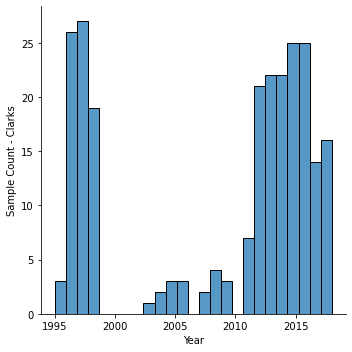

In [56]:
sns.displot(clarks['DATE'].dt.year,bins=25).set(xlabel="Year", ylabel="Sample Count - Clarks")

In [57]:
narrow_neck

,DATE,Entero,Rain24,Rain48,Rain72,RainWA,Wdirection,Wspeed,Solarhours,BeachName,BeachType,BeachDirection
0,1997-12-05,10,0.00,14.20,14.20,28.40,216,2.0,11.5,Narrow_Neck,0,1
1,1997-12-06,10,0.00,0.00,14.20,14.20,272,4.2,3.4,Narrow_Neck,0,1
2,1997-12-07,10,0.60,0.60,0.60,1.80,206,3.5,12.4,Narrow_Neck,0,1
3,1997-12-08,10,0.00,0.60,0.60,1.20,25,2.2,0.0,Narrow_Neck,0,1
4,1997-12-09,10,0.00,0.00,0.60,0.60,191,3.6,9.1,Narrow_Neck,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
473,2018-03-08,384,5.50,5.50,5.50,16.50,119,3.6,6.1,Narrow_Neck,0,1
474,2018-03-23,1553,2.38,2.38,2.38,7.14,41,4.4,4.7,Narrow_Neck,0,1
475,2018-04-20,74,0.00,0.00,1.99,1.99,278,2.1,6.1,Narrow_Neck,0,1
476,2018-05-10,10,0.00,0.00,0.00,0.00,250,0.4,3.3,Narrow_Neck,0,1


In [58]:
narrow_neck.describe()

,Entero,Rain24,Rain48,Rain72,RainWA,Wdirection,Wspeed,Solarhours,BeachType,BeachDirection
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.0,478.0
mean,37.320084,1.816067,3.703619,5.615167,11.134854,194.412134,2.349163,6.693305,0.0,1.0
std,125.509745,4.740609,7.741333,10.095982,20.966769,89.930859,1.199226,3.937760,0.0,0.0
min,10.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.300000,0.000000,0.0,1.0
25%,10.000000,0.000000,0.000000,0.000000,0.000000,117.500000,1.500000,3.325000,0.0,1.0
50%,10.000000,0.000000,0.200000,1.035000,1.580000,223.500000,2.200000,7.100000,0.0,1.0
75%,10.000000,0.555000,3.335000,6.007500,12.595000,258.000000,3.100000,10.075000,0.0,1.0
max,1553.000000,39.000000,73.540000,81.500000,171.760000,358.000000,6.600000,13.300000,0.0,1.0


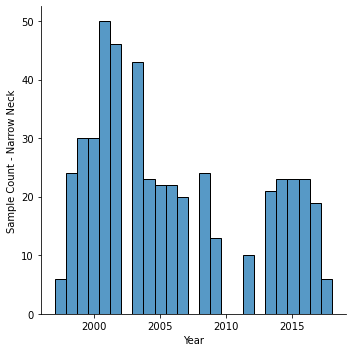

In [59]:
sns.displot(narrow_neck['DATE'].dt.year,bins=25).set(xlabel="Year", ylabel="Sample Count - Narrow Neck")

In [60]:
judges_bay

,DATE,Entero,R(24),R(48),R(72),R(WA),Wdirection,Wspeed,Solarhours,BeachName,BeachType,BeachDirection
0,1995-12-16,14.0,0.17,23.20,29.47,52.84,198,1.8,1.8,Judges_Bay,1,1
1,1995-12-27,10.0,0.58,3.54,5.66,9.78,264,4.0,8.5,Judges_Bay,1,1
2,1995-12-28,32.0,0.00,0.58,3.54,4.12,293,2.9,11.7,Judges_Bay,1,1
3,1996-01-07,10.0,0.00,0.00,0.00,0.00,98,3.2,7.9,Judges_Bay,1,1
4,1996-01-08,10.0,0.00,0.00,0.00,0.00,77,3.7,4.4,Judges_Bay,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
462,2017-03-01,10.0,0.00,0.00,0.00,0.00,225,0.5,5.1,Judges_Bay,1,1
463,2017-03-07,10.0,15.00,15.00,15.00,45.00,26,0.6,0.0,Judges_Bay,1,1
464,2017-03-15,10.0,0.00,0.00,1.50,1.50,194,1.7,11.1,Judges_Bay,1,1
465,2017-03-21,10.0,1.50,1.50,1.50,4.50,239,2.7,4.9,Judges_Bay,1,1


In [61]:
judges_bay = judges_bay.rename(columns={'R(24)':'Rain24', 'R(48)':'Rain48', 'R(72)':'Rain72', 'R(WA)':'RainWA'})
judges_bay.describe()

,Entero,Rain24,Rain48,Rain72,RainWA,Wdirection,Wspeed,Solarhours,BeachType,BeachDirection
count,466.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.0,467.0
mean,80.828326,1.596274,3.739550,6.488929,11.824754,191.269807,2.365310,6.865096,1.0,1.0
std,393.955312,4.207331,8.158608,12.816639,22.672470,86.732780,1.148388,3.794247,0.0,0.0
min,10.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.200000,0.000000,1.0,1.0
25%,10.000000,0.000000,0.000000,0.000000,0.000000,131.000000,1.500000,3.650000,1.0,1.0
50%,10.000000,0.000000,0.490000,1.500000,2.810000,215.000000,2.300000,7.400000,1.0,1.0
75%,20.000000,0.940000,3.765000,7.105000,12.940000,252.000000,3.000000,10.050000,1.0,1.0
max,5500.000000,40.000000,103.990000,112.780000,227.510000,358.000000,7.600000,13.300000,1.0,1.0


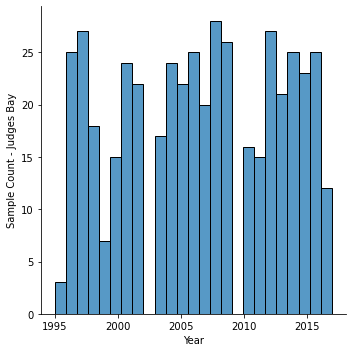

In [62]:
sns.displot(judges_bay['DATE'].dt.year,bins=25).set(xlabel="Year", ylabel="Sample Count - Judges Bay")

In [63]:
weymouth

,Date,Entero,Rain(24),Rain(48),Rain(72),Rain(WA),Wdirection,Wspeed,SolarHours,BeachName,BeachType,BeachDirection
0,1997-12-05,10.0,0.0,10.42,10.42,20.84,190,3.1,11.5,Weymouth,1,10
1,1997-12-06,10.0,0.0,0.00,10.42,10.42,230,7.7,3.4,Weymouth,1,10
2,1997-12-07,10.0,0.0,0.00,0.00,0.00,180,5.7,12.4,Weymouth,1,10
3,1997-12-08,10.0,0.0,0.00,0.00,0.00,20,2.1,0.0,Weymouth,1,10
4,1997-12-09,10.0,0.0,0.00,0.00,0.00,170,3.6,9.1,Weymouth,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
276,2018-08-09,228.0,8.5,8.50,8.50,25.50,230,5.0,9.0,Weymouth,1,10
277,2018-08-14,3654.0,12.5,13.00,13.00,38.50,307,3.5,4.1,Weymouth,1,10
278,2018-08-17,2282.0,14.0,14.00,18.50,46.50,240,4.7,2.0,Weymouth,1,10
279,2018-08-23,24196.0,6.0,28.50,33.50,68.00,270,5.6,5.5,Weymouth,1,10


In [64]:
weymouth=weymouth.rename(columns={'Date':'DATE', 'Rain(24)':'Rain24', 'Rain(48)':'Rain48', 'Rain(72)':'Rain72', 'Rain(WA)':'RainWA', 'SolarHours':'Solarhours'})
weymouth.describe()

,Entero,Rain24,Rain48,Rain72,RainWA,Wdirection,Wspeed,Solarhours,BeachType,BeachDirection
count,280.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.0,281.0
mean,782.667857,3.020854,5.729573,8.136370,16.886797,180.448399,3.573310,6.657651,1.0,10.0
std,2870.436430,7.915018,11.502299,14.149889,30.528040,94.204176,2.336565,3.856389,0.0,0.0
min,10.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.200000,0.000000,1.0,10.0
25%,10.000000,0.000000,0.000000,0.000000,0.000000,108.000000,1.900000,3.500000,1.0,10.0
50%,57.500000,0.000000,0.490000,1.480000,2.910000,191.000000,3.000000,7.100000,1.0,10.0
75%,296.250000,1.660000,5.700000,10.500000,20.890000,248.000000,4.900000,9.900000,1.0,10.0
max,24196.000000,56.310000,64.120000,92.850000,168.930000,360.000000,14.200000,13.600000,1.0,10.0


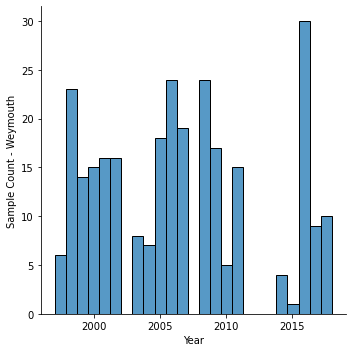

In [65]:
sns.displot(weymouth['DATE'].dt.year,bins=25).set(xlabel="Year", ylabel="Sample Count - Weymouth")

In [66]:
milford

,DATE,Entero,Rain24,Rain48,Rain72,RainWA,Wdirection,Wspeed,Solarhours,BeachName,BeachType,BeachDirection
0,1995-12-16,10,0.0,22.66,26.14,48.80,198,1.8,1.8,Milford,0,2
1,1995-12-27,10,0.0,2.91,4.65,7.56,264,4.0,8.5,Milford,0,2
2,1995-12-28,10,0.0,0.00,2.91,2.91,293,2.9,11.7,Milford,0,2
3,1996-01-07,10,0.0,0.00,0.00,0.00,98,3.2,7.9,Milford,0,2
4,1996-01-08,44,0.0,0.00,0.00,0.00,77,3.7,4.4,Milford,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
543,2017-08-18,38,1.5,1.50,1.50,4.50,172,1.7,1.6,Milford,0,2
544,2017-08-28,90,6.5,8.00,8.00,22.50,5,4.1,3.7,Milford,0,2
545,2017-09-14,11,0.0,1.00,4.00,5.00,261,3.1,2.8,Milford,0,2
546,2017-09-18,43,26.0,26.50,34.00,86.50,276,2.8,6.1,Milford,0,2


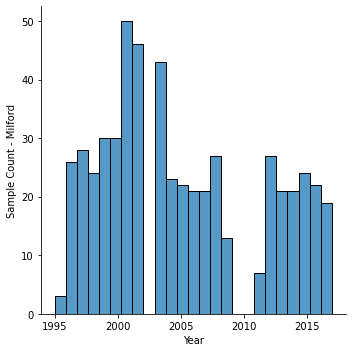

In [67]:
sns.displot(milford['DATE'].dt.year,bins=25).set(xlabel="Year", ylabel="Sample Count - Milford")

In [111]:
# combine all beach data
full_dataset = clarks.append([narrow_neck, judges_bay, weymouth, milford], ignore_index=True)
full_dataset.describe()

,Entero,Rain24,Rain48,Rain72,RainWA,Wdirection,Wspeed,Solarhours,BeachType,BeachDirection
count,2017.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000
mean,182.596926,2.052343,4.375696,6.873066,13.301105,187.835562,2.703368,6.700000,0.491828,4.222883
std,1271.550681,5.676262,9.303283,12.589923,25.198345,90.961136,1.670287,3.849938,0.500057,4.995424
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,113.000000,1.500000,3.500000,0.000000,1.000000
50%,10.000000,0.000000,0.490000,1.460000,2.420000,211.000000,2.400000,7.200000,0.000000,2.000000
75%,20.000000,0.980000,4.290000,7.700000,15.000000,253.000000,3.400000,10.000000,1.000000,10.000000
max,24196.000000,57.900000,115.250000,127.320000,251.620000,360.000000,14.200000,14.100000,1.000000,15.000000


In [112]:
# remove missing data
full_dataset = full_dataset.dropna()
full_dataset = full_dataset.reset_index(drop=True)
full_dataset.describe()

,Entero,Rain24,Rain48,Rain72,RainWA,Wdirection,Wspeed,Solarhours,BeachType,BeachDirection
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,182.596926,2.052960,4.378617,6.878463,13.310040,187.879028,2.702033,6.703718,0.491324,4.221616
std,1271.550681,5.678971,9.307389,12.594966,25.209095,90.915915,1.670540,3.849683,0.500049,4.995729
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,113.000000,1.500000,3.500000,0.000000,1.000000
50%,10.000000,0.000000,0.490000,1.460000,2.420000,211.000000,2.400000,7.200000,0.000000,2.000000
75%,20.000000,0.980000,4.290000,7.730000,15.160000,253.000000,3.400000,10.000000,1.000000,10.000000
max,24196.000000,57.900000,115.250000,127.320000,251.620000,360.000000,14.200000,14.100000,1.000000,15.000000


In [113]:
# Add Entero_level column for positive and negative
full_dataset['Entero_level'] = np.where(full_dataset['Entero']>=280, 1, 0)

In [114]:
full_dataset

,DATE,Entero,Rain24,Rain48,Rain72,RainWA,Wdirection,Wspeed,Solarhours,BeachName,BeachType,BeachDirection,Entero_level
0,1995-12-16,10.0,9.17,13.67,37.00,59.84,200,1.5,1.8,Clarks,1,15,0
1,1995-12-27,10.0,0.00,0.00,0.33,0.33,230,5.7,8.5,Clarks,1,15,0
2,1995-12-28,10.0,2.50,2.50,2.50,7.50,320,3.6,11.7,Clarks,1,15,0
3,1996-01-07,10.0,0.00,0.00,0.00,0.00,130,4.1,7.9,Clarks,1,15,0
4,1996-01-08,10.0,0.00,0.00,0.00,0.00,100,3.6,4.4,Clarks,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2017-08-18,38.0,1.50,1.50,1.50,4.50,172,1.7,1.6,Milford,0,2,0
2013,2017-08-28,90.0,6.50,8.00,8.00,22.50,5,4.1,3.7,Milford,0,2,0
2014,2017-09-14,11.0,0.00,1.00,4.00,5.00,261,3.1,2.8,Milford,0,2,0
2015,2017-09-18,43.0,26.00,26.50,34.00,86.50,276,2.8,6.1,Milford,0,2,0


In [115]:
# Stats
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            2017 non-null   datetime64[ns]
 1   Entero          2017 non-null   float64       
 2   Rain24          2017 non-null   float64       
 3   Rain48          2017 non-null   float64       
 4   Rain72          2017 non-null   float64       
 5   RainWA          2017 non-null   float64       
 6   Wdirection      2017 non-null   int64         
 7   Wspeed          2017 non-null   float64       
 8   Solarhours      2017 non-null   float64       
 9   BeachName       2017 non-null   object        
 10  BeachType       2017 non-null   int64         
 11  BeachDirection  2017 non-null   int64         
 12  Entero_level    2017 non-null   int32         
dtypes: datetime64[ns](1), float64(7), int32(1), int64(3), object(1)
memory usage: 197.1+ KB


In [116]:
full_dataset.describe()

,Entero,Rain24,Rain48,Rain72,RainWA,Wdirection,Wspeed,Solarhours,BeachType,BeachDirection,Entero_level
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,182.596926,2.052960,4.378617,6.878463,13.310040,187.879028,2.702033,6.703718,0.491324,4.221616,0.073872
std,1271.550681,5.678971,9.307389,12.594966,25.209095,90.915915,1.670540,3.849683,0.500049,4.995729,0.261627
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,113.000000,1.500000,3.500000,0.000000,1.000000,0.000000
50%,10.000000,0.000000,0.490000,1.460000,2.420000,211.000000,2.400000,7.200000,0.000000,2.000000,0.000000
75%,20.000000,0.980000,4.290000,7.730000,15.160000,253.000000,3.400000,10.000000,1.000000,10.000000,0.000000
max,24196.000000,57.900000,115.250000,127.320000,251.620000,360.000000,14.200000,14.100000,1.000000,15.000000,1.000000


In [117]:
print(full_dataset.groupby([full_dataset['BeachName'], full_dataset['DATE'].dt.year])['Entero_level'].count())

BeachName  DATE
Clarks     1995     3
           1996    26
           1997    27
           1998    19
           2003     1
                   ..
Weymouth   2014     4
           2015     1
           2016    30
           2017     9
           2018    10
Name: Entero_level, Length: 104, dtype: int64


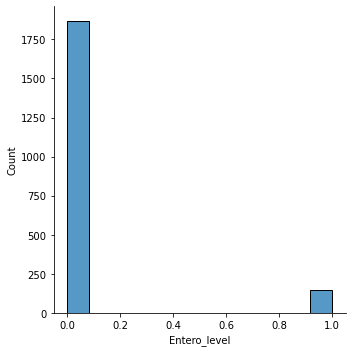

In [118]:
sns.displot(full_dataset['Entero_level'])

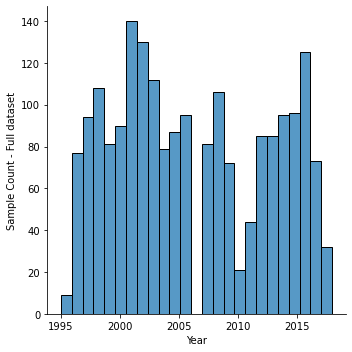

In [119]:
sns.displot(full_dataset['DATE'].dt.year, bins=25).set(xlabel="Year", ylabel="Sample Count - Full dataset")

In [120]:
# add column Wspeed: 0 - 5 (Zhang et al.)
conditions=[(full_dataset['Wspeed']==0), 
            (full_dataset['Wspeed']>0) & (full_dataset['Wspeed']<=8.05),
           (full_dataset['Wspeed']>8.05) & (full_dataset['Wspeed']<=16.09),
           (full_dataset['Wspeed']>16.09) & (full_dataset['Wspeed']<=24.14),
           (full_dataset['Wspeed']>24.14) & (full_dataset['Wspeed']<=32.19),
           (full_dataset['Wspeed']>32.19)]
values =[0, 1, 2, 3, 4, 5]
full_dataset['Wspeed_level'] = np.select(conditions, values)

In [121]:
full_dataset.head()

,DATE,Entero,Rain24,Rain48,Rain72,RainWA,Wdirection,Wspeed,Solarhours,BeachName,BeachType,BeachDirection,Entero_level,Wspeed_level
0,1995-12-16,10.0,9.17,13.67,37.00,59.84,200,1.5,1.8,Clarks,1,15,0,1
1,1995-12-27,10.0,0.00,0.00,0.33,0.33,230,5.7,8.5,Clarks,1,15,0,1
2,1995-12-28,10.0,2.50,2.50,2.50,7.50,320,3.6,11.7,Clarks,1,15,0,1
3,1996-01-07,10.0,0.00,0.00,0.00,0.00,130,4.1,7.9,Clarks,1,15,0,1
4,1996-01-08,10.0,0.00,0.00,0.00,0.00,100,3.6,4.4,Clarks,1,15,0,1


In [122]:
# add column Wdirection_level (cardinal direction): 0 - 15 (0-N, 1-NNE, 2-NE, 3-ENE, 4-E, 5-ESE, 6-SE, 7-SSE, 8-S, 9-SSW, 10-SW, 11-WSW, 12-W, 13-WNW, 14-NW, 15-NNW)
conditions=[np.any([np.all([full_dataset['Wdirection']>348.75, full_dataset['Wdirection']<=360]), np.all([full_dataset['Wdirection']>=0, full_dataset['Wdirection']<=11.25])]), 
            (full_dataset['Wdirection']>11.25) & (full_dataset['Wdirection']<=33.75),
           (full_dataset['Wdirection']>33.75) & (full_dataset['Wdirection']<=56.25),
           (full_dataset['Wdirection']>56.25) & (full_dataset['Wdirection']<=78.75),
           (full_dataset['Wdirection']>78.75) & (full_dataset['Wdirection']<=101.25),
           (full_dataset['Wdirection']>101.25) & (full_dataset['Wdirection']<=123.75),
           (full_dataset['Wdirection']>123.75) & (full_dataset['Wdirection']<=146.25),
           (full_dataset['Wdirection']>146.25) & (full_dataset['Wdirection']<=168.75),
             (full_dataset['Wdirection']>168.75) & (full_dataset['Wdirection']<=191.25),
           (full_dataset['Wdirection']>191.25) & (full_dataset['Wdirection']<=213.75),
             (full_dataset['Wdirection']>213.75) & (full_dataset['Wdirection']<=236.25),
           (full_dataset['Wdirection']>236.25) & (full_dataset['Wdirection']<=258.75),
             (full_dataset['Wdirection']>258.75) & (full_dataset['Wdirection']<=281.25),
           (full_dataset['Wdirection']>281.25) & (full_dataset['Wdirection']<=303.75),
             (full_dataset['Wdirection']>303.75) & (full_dataset['Wdirection']<=326.25),
           (full_dataset['Wdirection']>326.25) & (full_dataset['Wdirection']<=348.75),
           ]
values =[i for i in range(16)]
full_dataset['Wdirection_level'] = np.select(conditions, values)

In [123]:
full_dataset.describe()

,Entero,Rain24,Rain48,Rain72,RainWA,Wdirection,Wspeed,Solarhours,BeachType,BeachDirection,Entero_level,Wspeed_level,Wdirection_level
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,182.596926,2.052960,4.378617,6.878463,13.310040,187.879028,2.702033,6.703718,0.491324,4.221616,0.073872,1.010412,8.029251
std,1271.550681,5.678971,9.307389,12.594966,25.209095,90.915915,1.670540,3.849683,0.500049,4.995729,0.261627,0.106303,4.073803
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,113.000000,1.500000,3.500000,0.000000,1.000000,0.000000,1.000000,5.000000
50%,10.000000,0.000000,0.490000,1.460000,2.420000,211.000000,2.400000,7.200000,0.000000,2.000000,0.000000,1.000000,9.000000
75%,20.000000,0.980000,4.290000,7.730000,15.160000,253.000000,3.400000,10.000000,1.000000,10.000000,0.000000,1.000000,11.000000
max,24196.000000,57.900000,115.250000,127.320000,251.620000,360.000000,14.200000,14.100000,1.000000,15.000000,1.000000,2.000000,15.000000


In [124]:
# add column on_offshore based on difference between 'BeachDirection' and 'Wdirection_level': 0 - off shore, 1 - on shore, 2 - cross shore 
full_dataset['x']=abs(full_dataset['BeachDirection']-full_dataset['Wdirection_level']).astype('int')
conditions=[(full_dataset['x']<3),
            (full_dataset['x']>=3) & (full_dataset['x']<6),
            (full_dataset['x']>=6) & (full_dataset['x']<11),
            (full_dataset['x']>=11) & (full_dataset['x']<14),
            (full_dataset['x']>=14),
           ]
values =[1,2,0,2,1]
full_dataset['on_offshore'] = np.select(conditions, values)
data_frame=full_dataset.drop('x',axis=1)

In [125]:
full_dataset.describe()

,Entero,Rain24,Rain48,Rain72,RainWA,Wdirection,Wspeed,Solarhours,BeachType,BeachDirection,Entero_level,Wspeed_level,Wdirection_level,x,on_offshore
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,182.596926,2.052960,4.378617,6.878463,13.310040,187.879028,2.702033,6.703718,0.491324,4.221616,0.073872,1.010412,8.029251,6.628656,0.869113
std,1271.550681,5.678971,9.307389,12.594966,25.209095,90.915915,1.670540,3.849683,0.500049,4.995729,0.261627,0.106303,4.073803,3.944736,0.861271
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,113.000000,1.500000,3.500000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000
50%,10.000000,0.000000,0.490000,1.460000,2.420000,211.000000,2.400000,7.200000,0.000000,2.000000,0.000000,1.000000,9.000000,7.000000,1.000000
75%,20.000000,0.980000,4.290000,7.730000,15.160000,253.000000,3.400000,10.000000,1.000000,10.000000,0.000000,1.000000,11.000000,10.000000,2.000000
max,24196.000000,57.900000,115.250000,127.320000,251.620000,360.000000,14.200000,14.100000,1.000000,15.000000,1.000000,2.000000,15.000000,15.000000,2.000000


In [129]:
data_frame.head()

,DATE,Entero,Rain24,Rain48,Rain72,RainWA,Wdirection,Wspeed,Solarhours,BeachName,BeachType,BeachDirection,Entero_level,Wspeed_level,Wdirection_level,on_offshore
0,1995-12-16,10.0,9.17,13.67,37.00,59.84,200,1.5,1.8,Clarks,1,15,0,1,9,0
1,1995-12-27,10.0,0.00,0.00,0.33,0.33,230,5.7,8.5,Clarks,1,15,0,1,10,2
2,1995-12-28,10.0,2.50,2.50,2.50,7.50,320,3.6,11.7,Clarks,1,15,0,1,14,1
3,1996-01-07,10.0,0.00,0.00,0.00,0.00,130,4.1,7.9,Clarks,1,15,0,1,6,0
4,1996-01-08,10.0,0.00,0.00,0.00,0.00,100,3.6,4.4,Clarks,1,15,0,1,4,2


In [136]:
# Predicting factors (for visualisation and ML)
rain24 = data_frame['Rain24']
rain48 = data_frame['Rain48']
rain72 = data_frame['Rain72']
rainWA = data_frame['RainWA']
windDirection = data_frame['Wdirection']
windSpeed = data_frame['Wspeed']
solarHours = data_frame['Solarhours']
entero = data_frame['Entero']

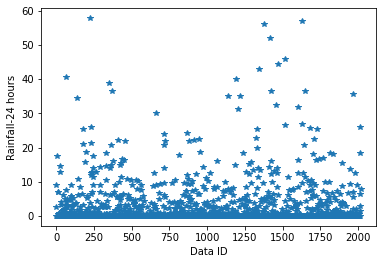

In [131]:
plt.plot(rain24,'*')
plt.ylabel('Rainfall-24 hours')
plt.xlabel('Data ID')
plt.show()

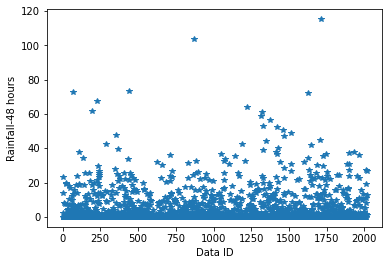

In [132]:
plt.plot(rain48,'*')
plt.ylabel('Rainfall-48 hours')
plt.xlabel('Data ID')
plt.show()

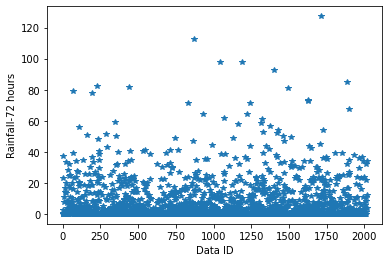

In [133]:
plt.plot(rain72,'*')
plt.ylabel('Rainfall-72 hours')
plt.xlabel('Data ID')
plt.show()

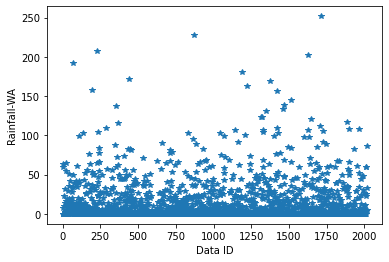

In [134]:
plt.plot(rainWA,'*')
plt.ylabel('Rainfall-WA')
plt.xlabel('Data ID')
plt.show()

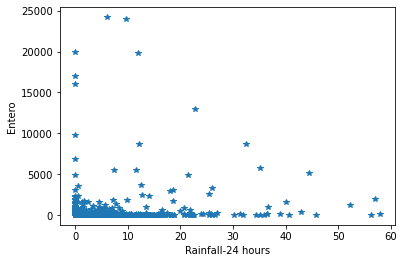

In [137]:
plt.plot(rain24,entero,'*')
plt.xlabel('Rainfall-24 hours')
plt.ylabel('Entero')
plt.show()

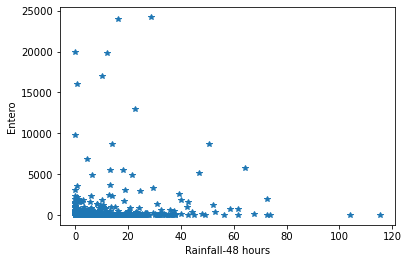

In [139]:
plt.plot(rain48,entero,'*')
plt.xlabel('Rainfall-48 hours')
plt.ylabel('Entero')
plt.show()

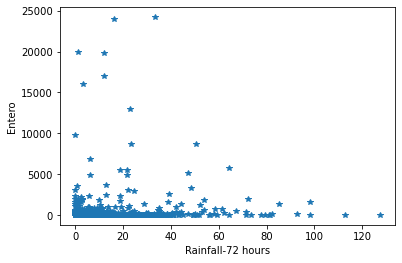

In [140]:
plt.plot(rain72,entero,'*')
plt.xlabel('Rainfall-72 hours')
plt.ylabel('Entero')
plt.show()

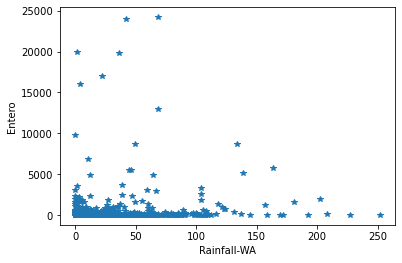

In [141]:
plt.plot(rainWA,entero,'*')
plt.xlabel('Rainfall-WA')
plt.ylabel('Entero')
plt.show()

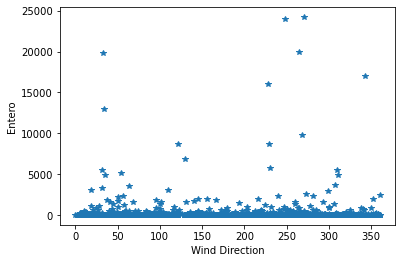

In [142]:
plt.plot(windDirection,entero,'*')
plt.xlabel('Wind Direction')
plt.ylabel('Entero')
plt.show()

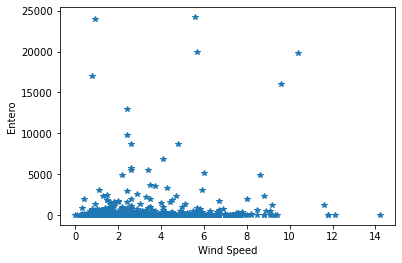

In [143]:
plt.plot(windSpeed,entero,'*')
plt.xlabel('Wind Speed')
plt.ylabel('Entero')
plt.show()

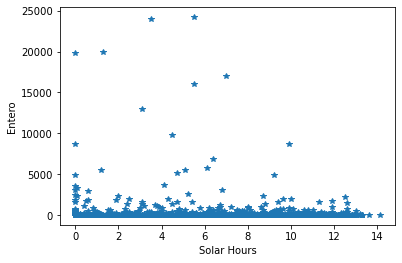

In [144]:
plt.plot(solarHours,entero,'*')
plt.xlabel('Solar Hours')
plt.ylabel('Entero')
plt.show()

In [145]:
np.where(data_frame['Entero']>20000) 

(array([1293, 1467], dtype=int64),)

In [155]:
print(data_frame.loc[[1292,1293,1294,1467,1468,1469]])

           DATE   Entero  Rain24  Rain48  Rain72  RainWA  Wdirection  Wspeed  \
1292 2004-12-15    270.0    0.51    0.51    1.53    2.55          62     1.8   
1293 2004-12-22  24000.0    9.66   16.27   16.27   42.20         248     0.9   
1294 2005-01-12     10.0    0.00    0.00    0.00    0.00         344     2.1   
1467 2018-08-23  24196.0    6.00   28.50   33.50   68.00         270     5.6   
1468 2018-08-29   5172.0   44.50   47.00   47.00  138.50          54     6.0   
1469 1995-12-16     10.0    0.00   22.66   26.14   48.80         198     1.8   

      Solarhours BeachName  BeachType  BeachDirection  Entero_level  \
1292         1.7  Weymouth          1              10             0   
1293         3.5  Weymouth          1              10             1   
1294         5.1  Weymouth          1              10             0   
1467         5.5  Weymouth          1              10             1   
1468         4.7  Weymouth          1              10             1   
1469         

In [156]:
## ML with unbalanced dataset
# Classification label
water_label = np.array(data_frame['Entero_level'],dtype=int)
index_above = np.where(water_label == 1)
index_below = np.where(water_label == 0)
water_above_label = water_label[index_above]

In [182]:
# Data normalization -test this option
rain24_std = preprocessing.normalize([rain24])
rain48_std = preprocessing.normalize([rain48])
rain72_std = preprocessing.normalize([rain72])
rainWA_std = preprocessing.normalize([rainWA])
windSpeed_std = preprocessing.normalize([windSpeed])
windDirection_std = preprocessing.normalize([windDirection])
solarHours_std = preprocessing.normalize([solarHours])

In [190]:
# Data normalization
rain24_std = (rain24 - np.min(rain24))/(np.max(rain24) - np.min(rain24))
rain48_std = (rain48 - np.min(rain48))/(np.max(rain48) - np.min(rain48))
rain72_std = (rain72 - np.min(rain72))/(np.max(rain72) - np.min(rain72))
rainWA_std = (rainWA - np.min(rainWA))/(np.max(rainWA) - np.min(rainWA))
windSpeed_std = (windSpeed - np.min(windSpeed))/(np.max(windSpeed) - np.min(windSpeed))
windDirection_std = windDirection / 360
solarHours_std = solarHours / 24

In [188]:
# Combine the data
factor_data = np.array([rain24_std, rain48_std,rain72_std,rainWA_std,windSpeed_std,windDirection_std,solarHours_std],dtype=float)
input_data = factor_data.T

In [189]:
input_data

array([[0.15837651, 0.11861171, 0.29060635, ..., 0.1056338 , 0.55555556,
        0.075     ],
       [0.        , 0.        , 0.00259189, ..., 0.40140845, 0.63888889,
        0.35416667],
       [0.04317789, 0.02169197, 0.01963556, ..., 0.25352113, 0.88888889,
        0.4875    ],
       ...,
       [0.        , 0.00867679, 0.0314169 , ..., 0.21830986, 0.725     ,
        0.11666667],
       [0.44905009, 0.22993492, 0.26704367, ..., 0.1971831 , 0.76666667,
        0.25416667],
       [0.13816926, 0.10845987, 0.09817782, ..., 0.08450704, 0.63888889,
        0.22916667]])